# Red Wine Quality Prediction Project
 
## Project Description

### The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).  This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

## Attribute Information

Input variables (based on physicochemical tests): 
1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol

### Output variable (based on sensory data): 12 - quality (score between 0 and 10)

### What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. 

### This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the  AUC value.

## You need to build a classification model. 

### Inspiration

#### Use machine learning to determine which physiochemical properties make a wine 'good'!

 
### Wine quality of 7 or higher categorized as "GOOD" quality. 

## Step 1: Importing Basic Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 : Loading Data :  Importing the dataset into our data analysis environment

In [2]:
data = pd.read_csv('/Users/sneha/Downloads/winequality-red.csv')
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

## Step 3: Perfrom EDA on Data

In [3]:
### Display first 5 records : 

data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Check dimensions
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 1599
Number of columns: 12


In [6]:
# Data types
data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [7]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

### 3.1 Check for missing values 

In [8]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<AxesSubplot:title={'center':'Checking Missing Value with Heatmap'}>

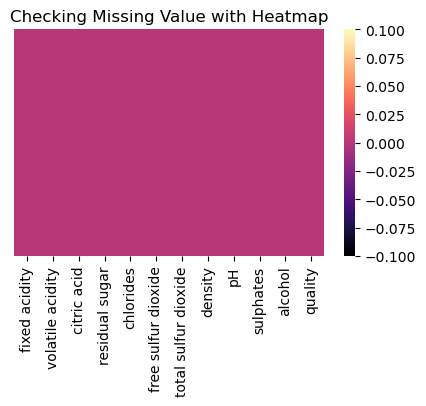

In [9]:
## Visualising the missing values in data using Heatmap. 


plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False)

### We dont have any missing value in the given Data. 

### 3.2 Summary Statistics: Compute summary statistics (e.g., mean, median, standard deviation, min, max) for numerical variables. This helps to understand the central tendencies and distributions of the data. 

In [10]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### 3.3 Understanging the Integer Column. 

In [11]:
# Get unique values and their counts
unique_values_counts = data['quality'].value_counts()

# Display unique values and their counts
print("Unique Values and their Counts:")
print(unique_values_counts)

Unique Values and their Counts:
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


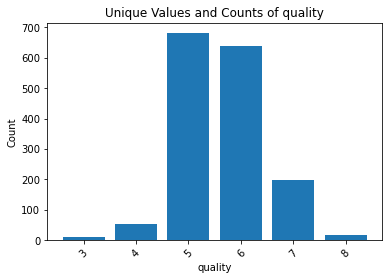

In [12]:
# Display unique values and their counts graphically
plt.bar(unique_values_counts.index, unique_values_counts.values)
plt.xlabel('quality')
plt.ylabel('Count')
plt.title(f'Unique Values and Counts of quality')
plt.xticks(rotation=45)
plt.show()

## 3.4 Understanding the Float Column

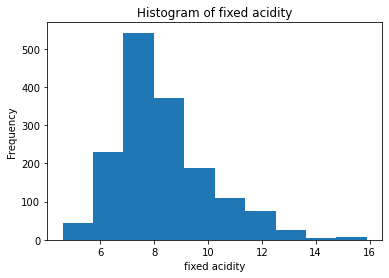

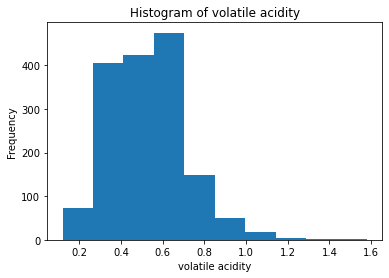

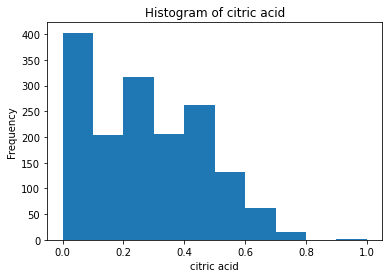

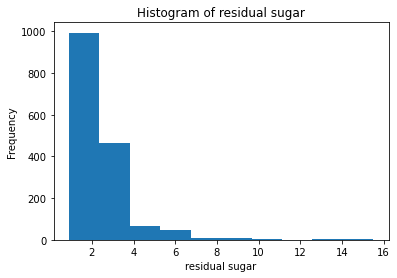

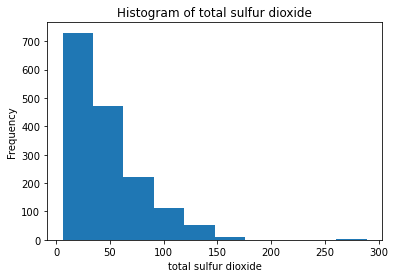

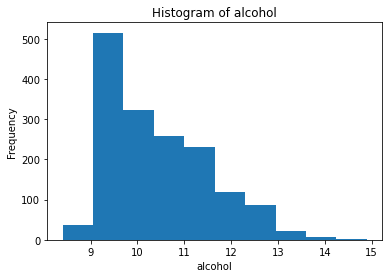

In [13]:
   # Create histograms for float columns
float_columns = data.select_dtypes(include='float')    
for column in float_columns.columns:
    plt.figure()
    plt.hist(float_columns[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [14]:
## From above we can see that there are outliers in our data. To see it clearly lets plot boxplots with respect to our output. 

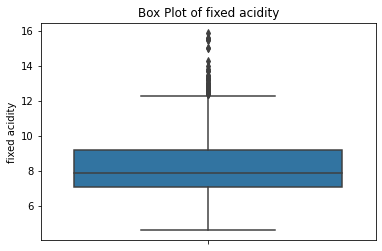

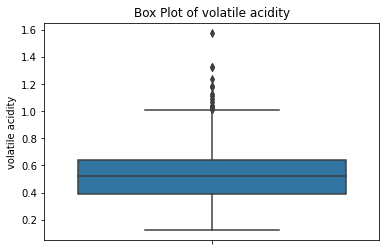

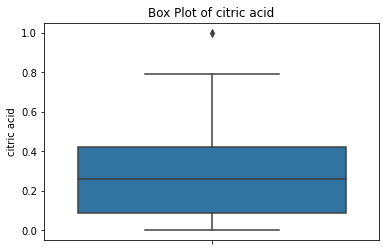

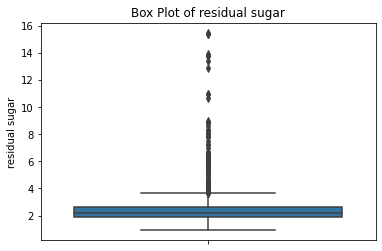

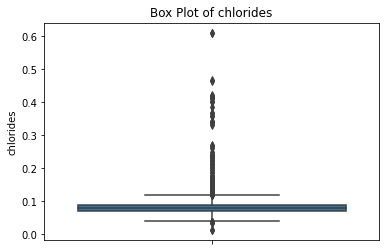

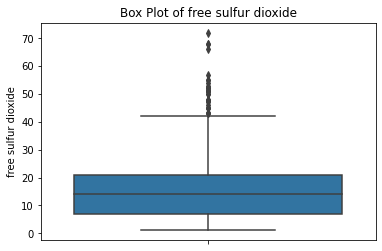

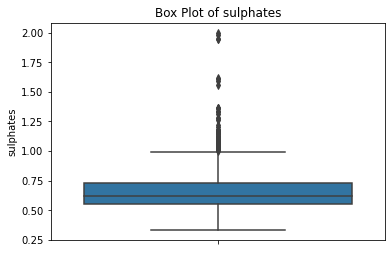

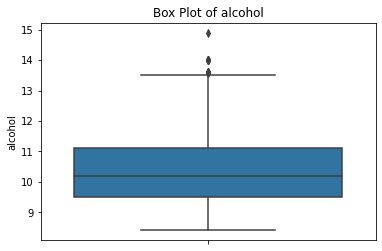

In [15]:
for column in float_columns.columns:
    plt.figure()
    sns.boxplot(data=data, y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

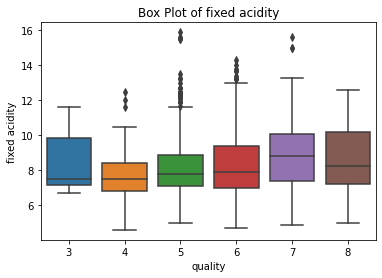

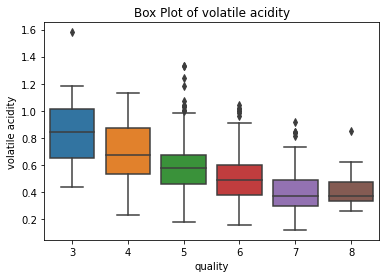

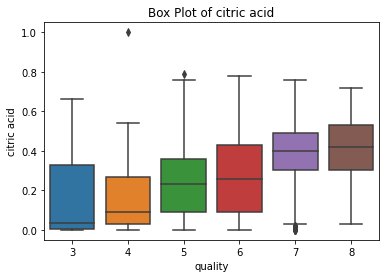

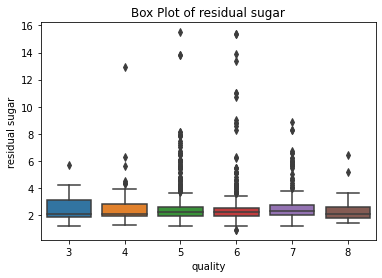

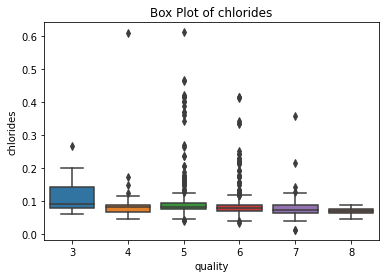

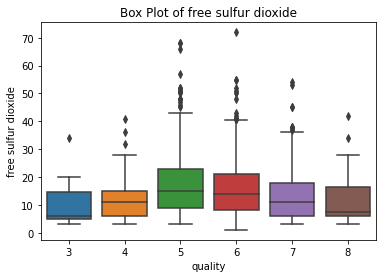

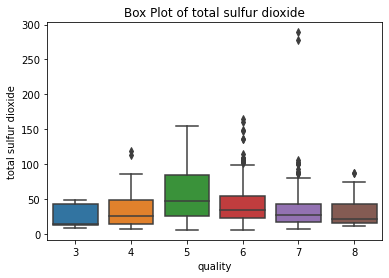

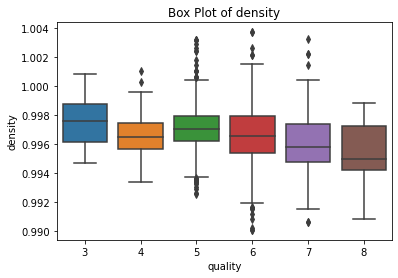

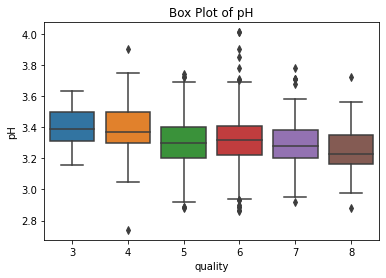

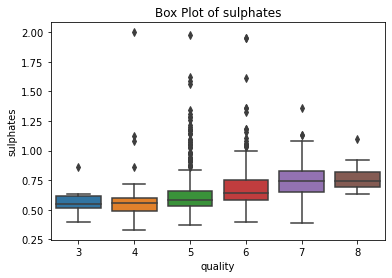

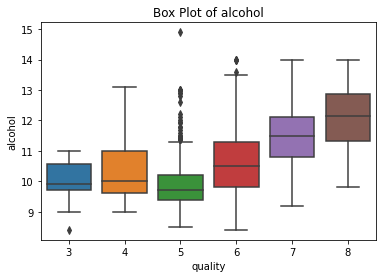

In [16]:
for column in float_columns.columns:
    plt.figure()
    sns.boxplot(data=data,x='quality', y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

## 3.5 Removing the outliers

## Lets fix this, by removing outliers. 
## By error and trial I am setting the lower and upper percentile, without losing much of the data. 

In [17]:
# Assuming 'data' is a numpy array or pandas DataFrame containing your data

lower_percentile = 1 
upper_percentile = 98.95 

lower_threshold = np.percentile(data, lower_percentile, axis=0)
upper_threshold = np.percentile(data, upper_percentile, axis=0)

data_no_outliers = data[
    (data >= lower_threshold).all(axis=1) & (data <= upper_threshold).all(axis=1)
]


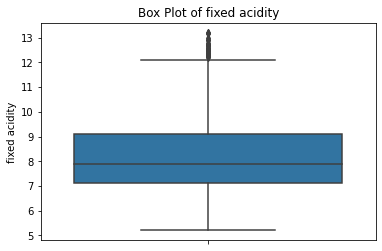

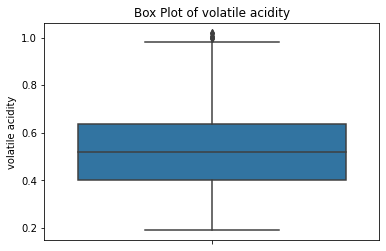

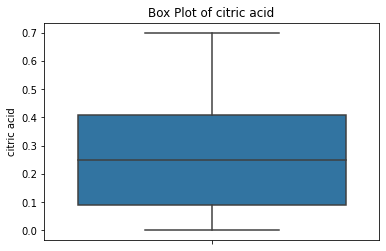

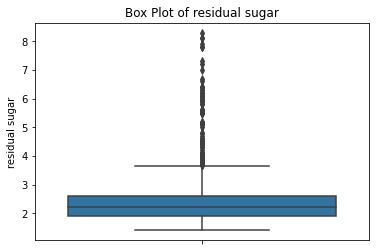

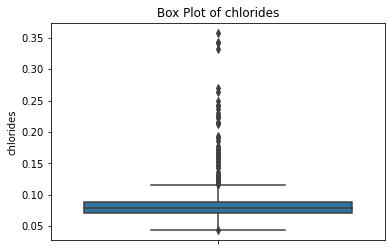

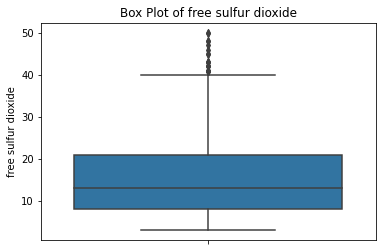

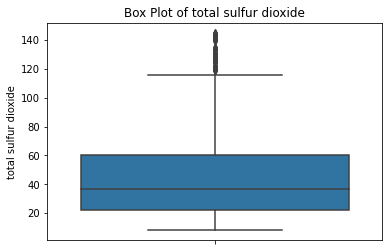

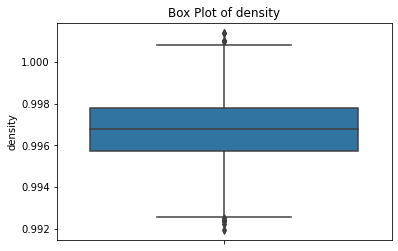

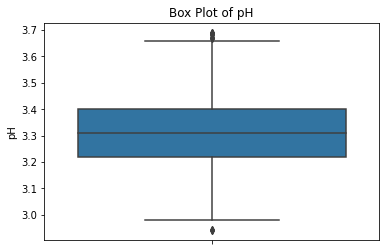

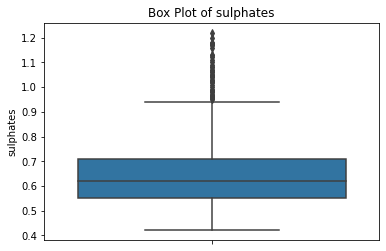

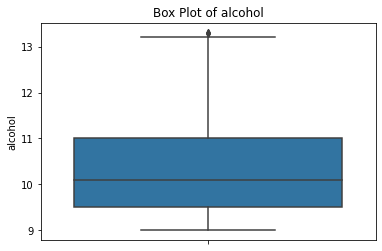

In [18]:
for column in float_columns.columns:
    plt.figure()
    sns.boxplot(data=data_no_outliers, y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

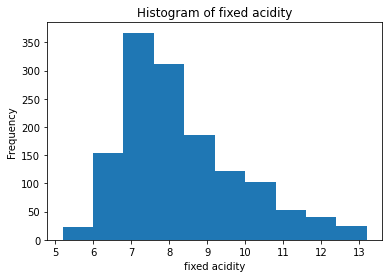

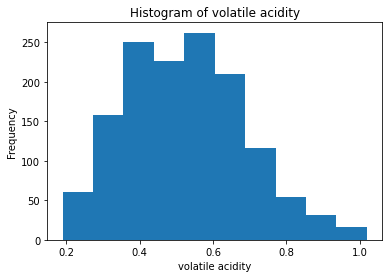

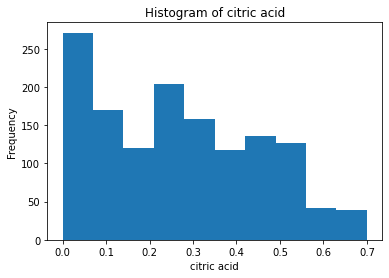

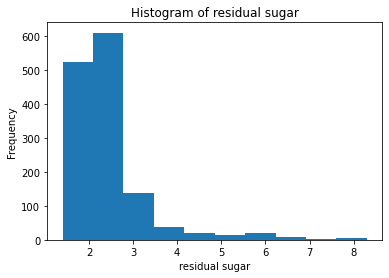

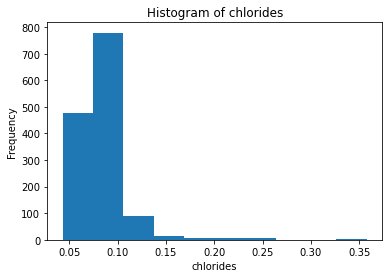

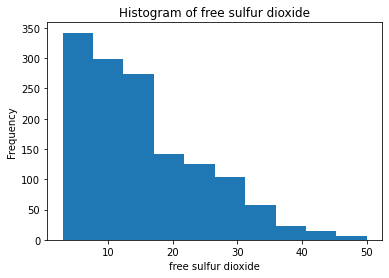

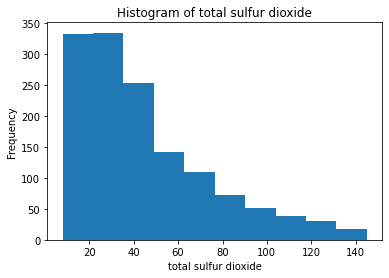

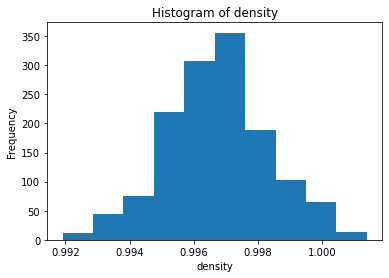

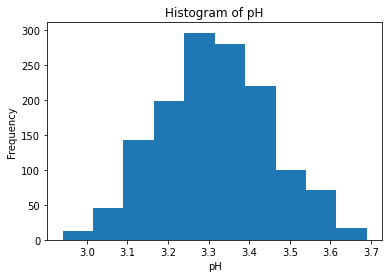

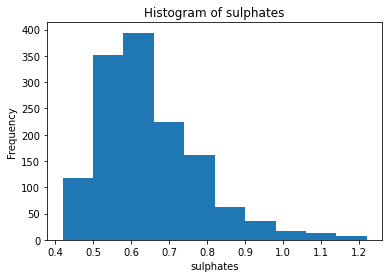

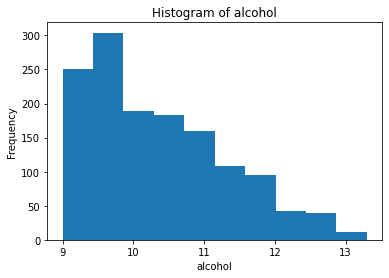

In [19]:
float_columns = data_no_outliers.select_dtypes(include='float')    
for column in float_columns.columns:
    plt.figure()
    plt.hist(float_columns[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

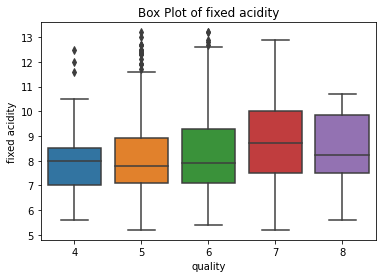

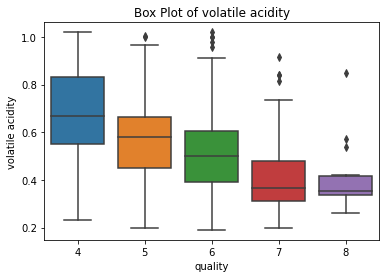

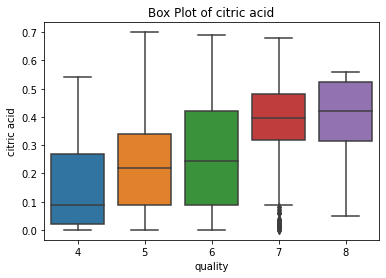

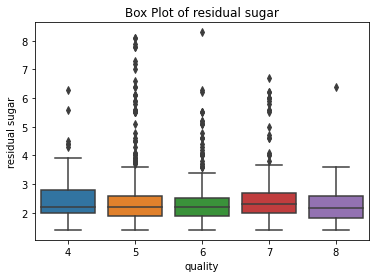

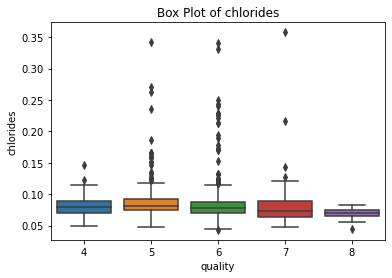

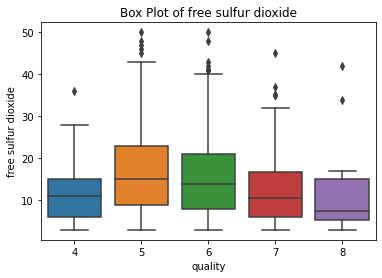

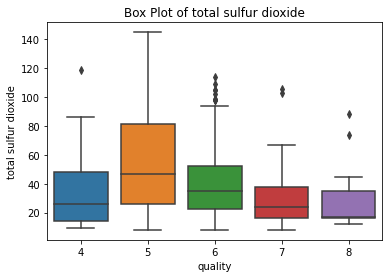

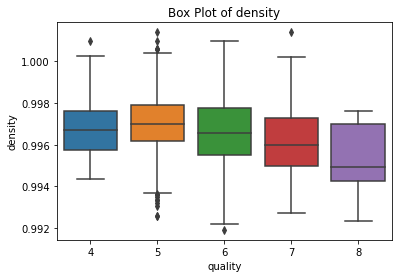

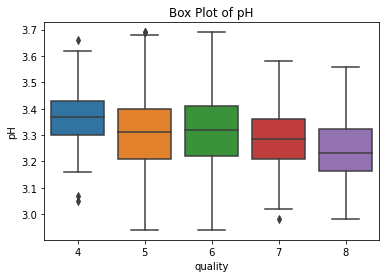

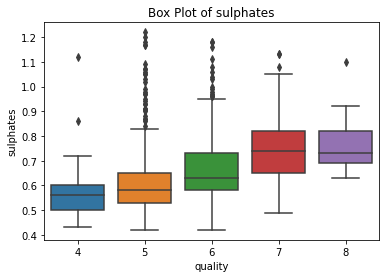

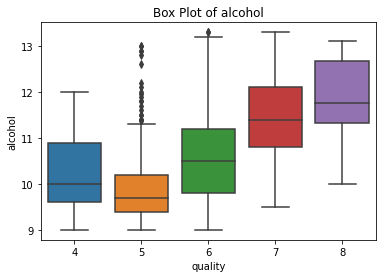

In [20]:
for column in float_columns.columns:
    plt.figure()
    sns.boxplot(data=data_no_outliers,x='quality', y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

## 3.6 Visualing the data by comparing the output and input variable. 

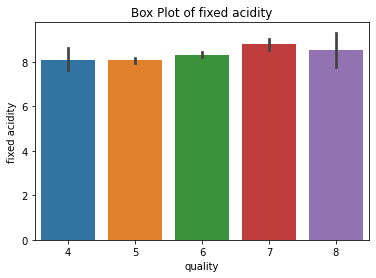

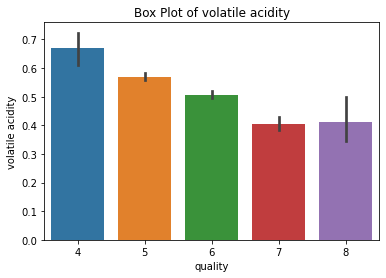

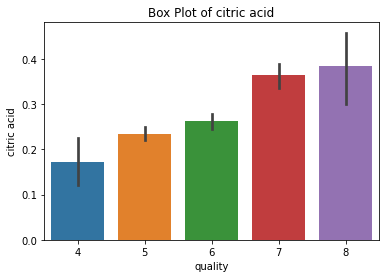

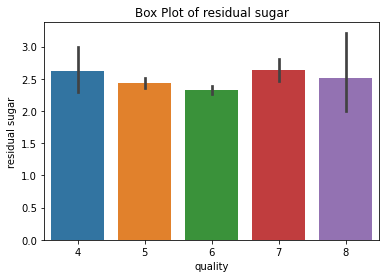

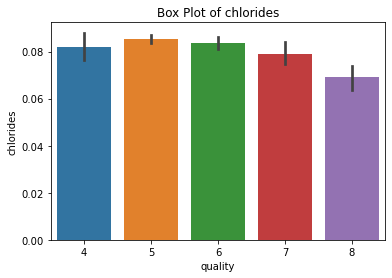

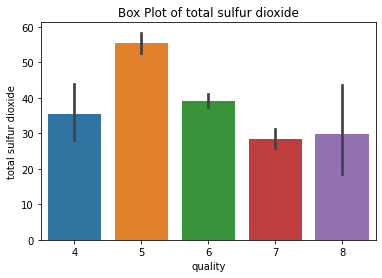

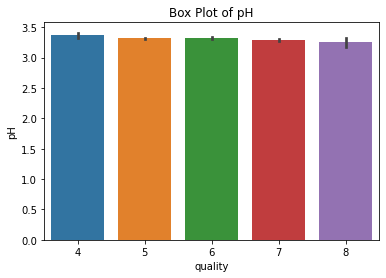

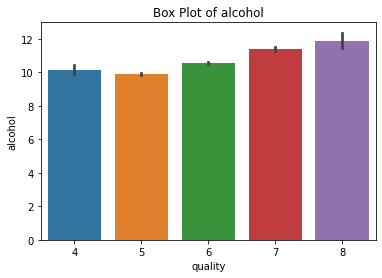

In [21]:
for column in float_columns.columns:
    plt.figure()
    sns.barplot(data=data_no_outliers,x='quality', y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()




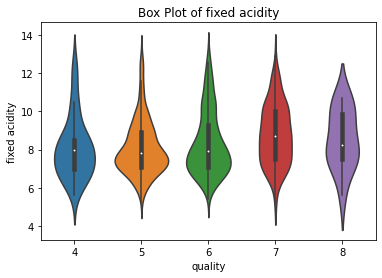

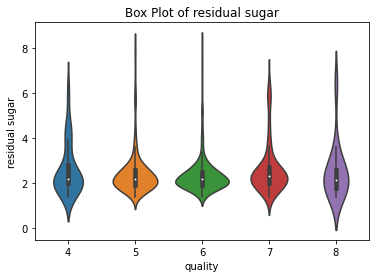

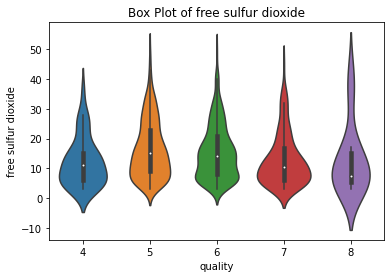

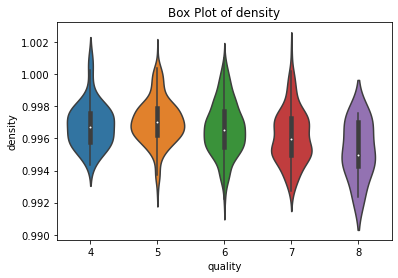

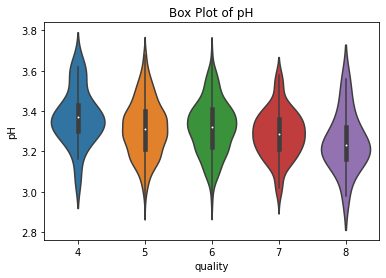

In [22]:
for column in float_columns.columns:
    plt.figure()
    sns.violinplot(data=data_no_outliers,x='quality', y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()



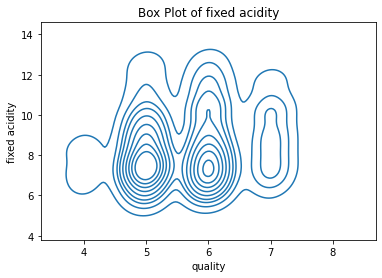

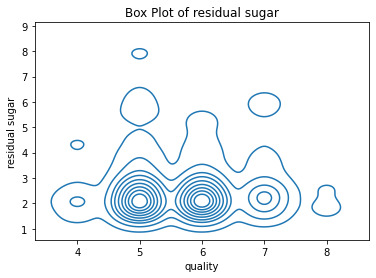

In [23]:
for column in float_columns.columns:
    plt.figure()
    sns.kdeplot(data=data_no_outliers,x='quality', y=column)
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

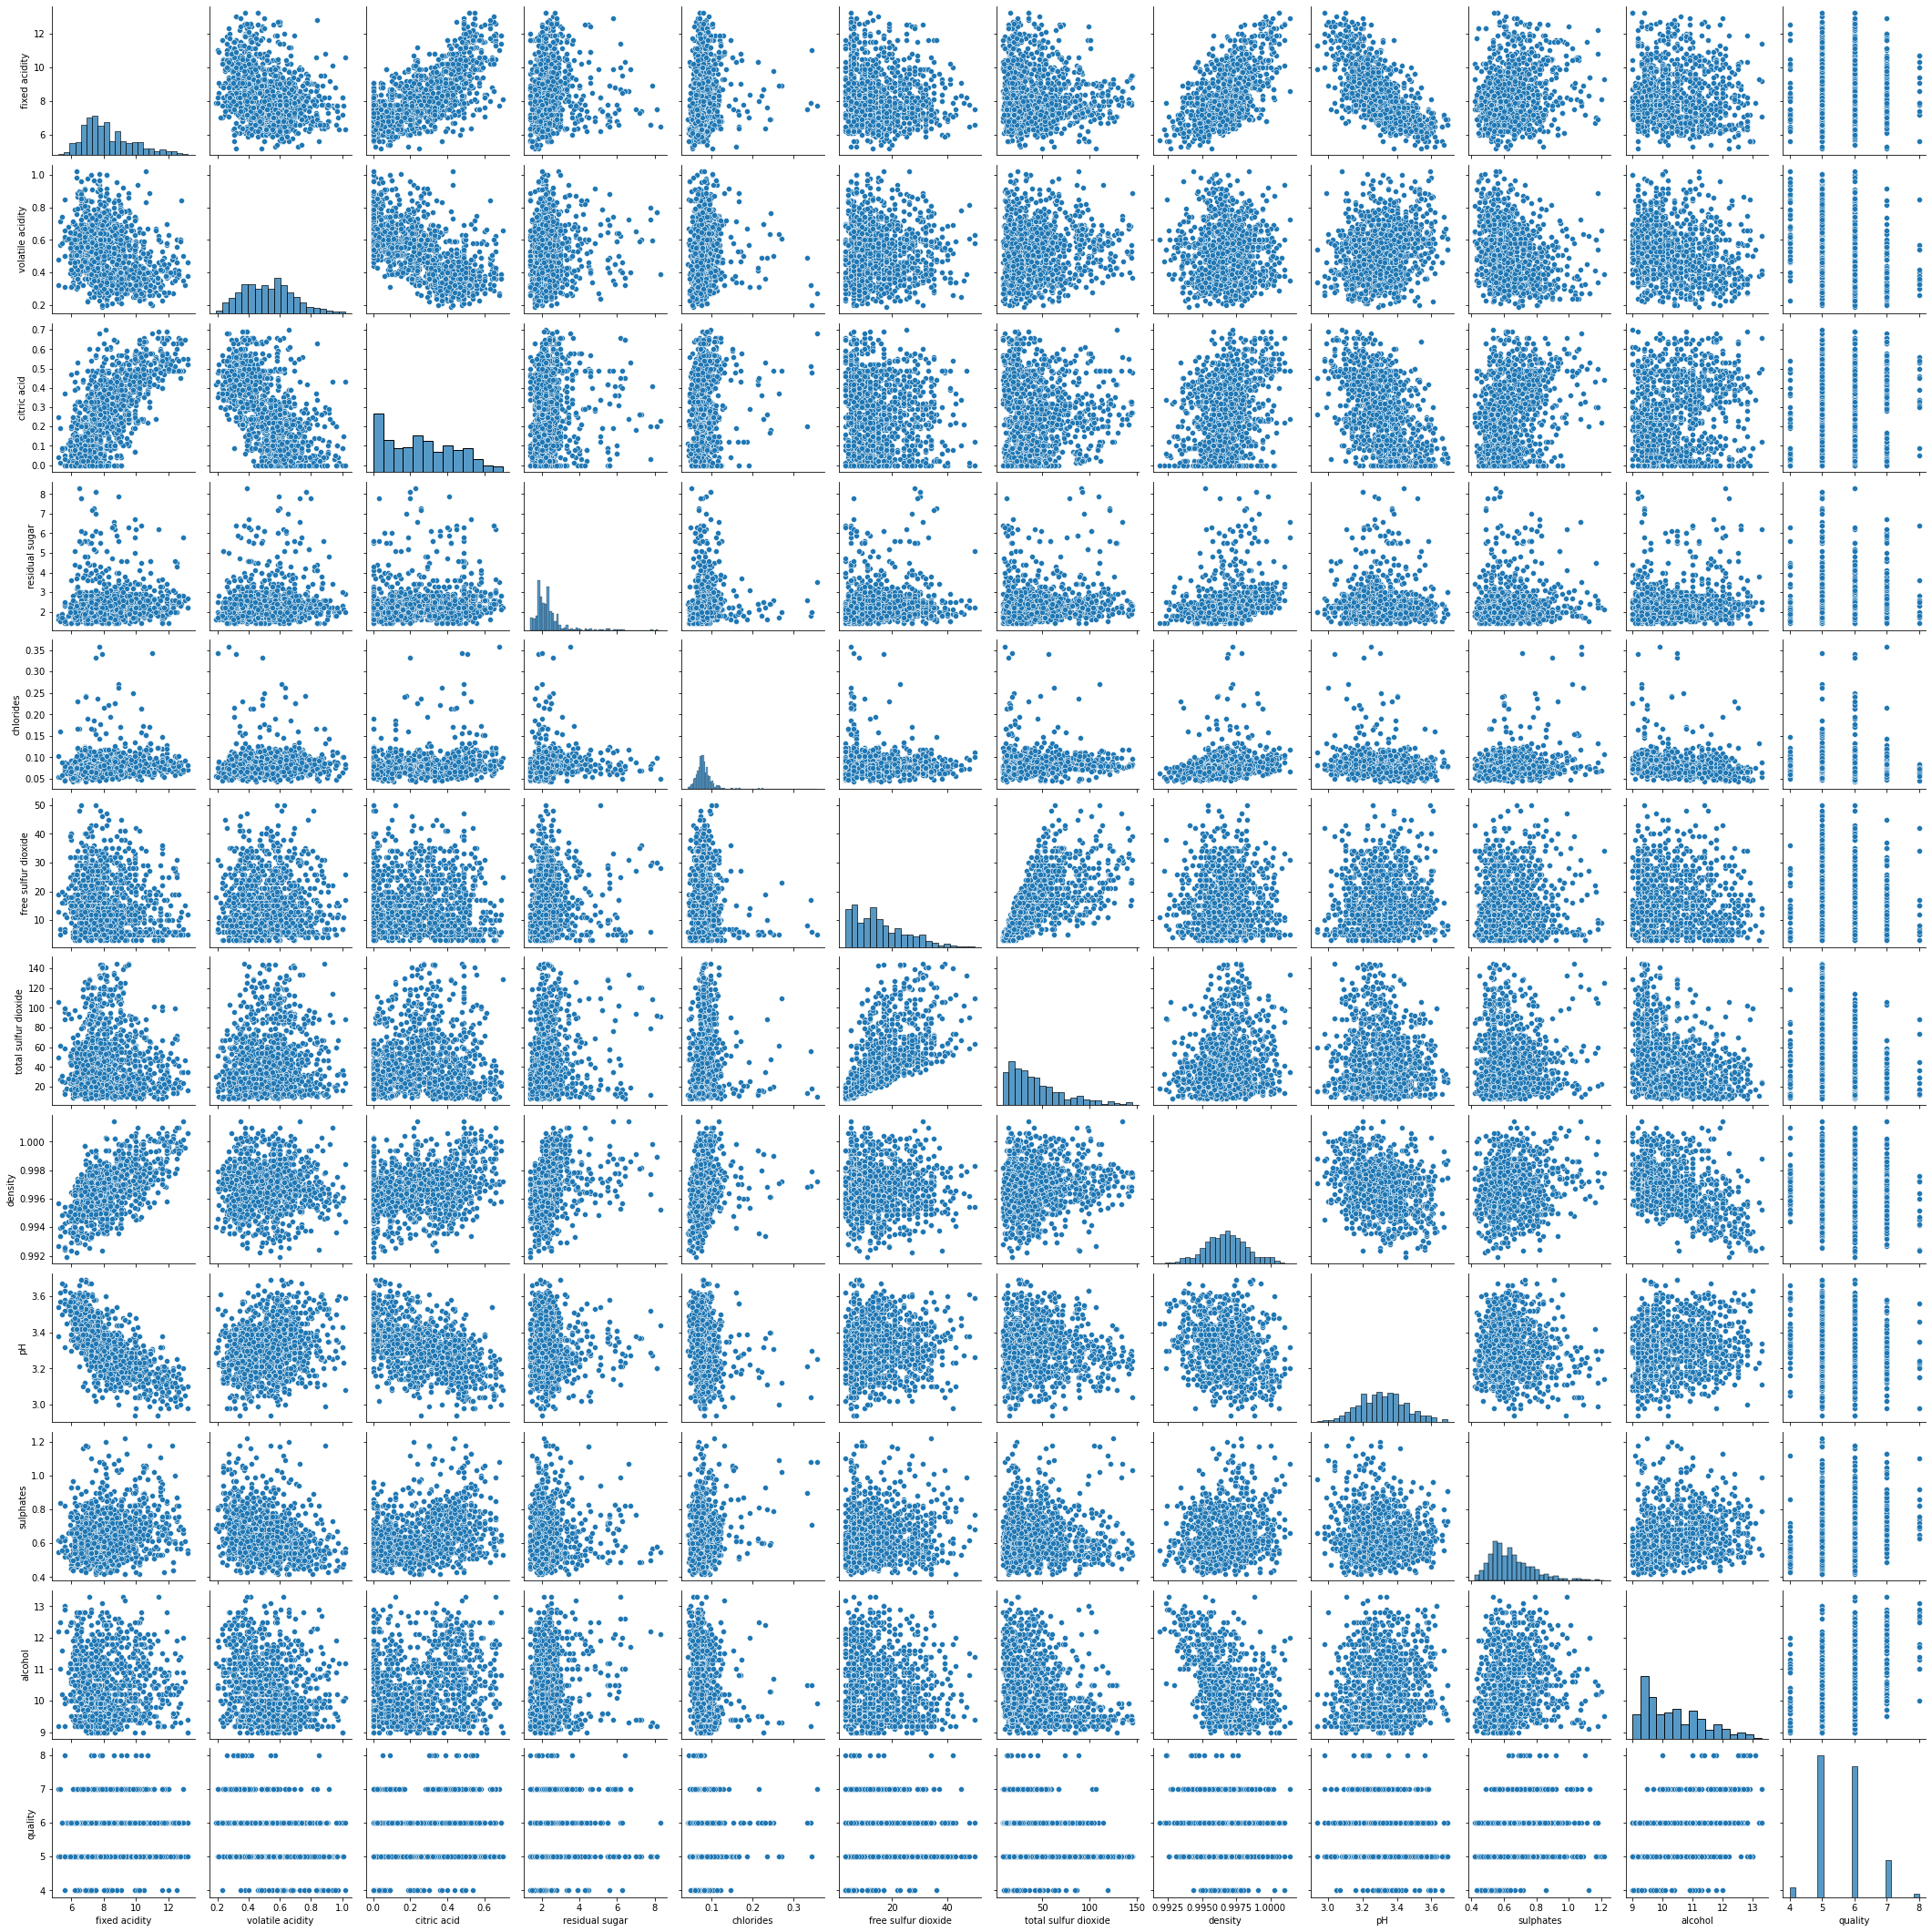

In [24]:
sns.pairplot(data_no_outliers)
plt.show()

In [25]:
data_no_outliers.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.292000     0.683096   
volatile acidity          -0.292000          1.000000    -0.602952   
citric acid                0.683096         -0.602952     1.000000   
residual sugar             0.084022          0.053462     0.113260   
chlorides                  0.115534          0.046500     0.115082   
free sulfur dioxide       -0.156642          0.007608    -0.093437   
total sulfur dioxide      -0.097587          0.107593     0.006344   
density                    0.624440          0.021170     0.341231   
pH                        -0.690211          0.248015    -0.520356   
sulphates                  0.194056         -0.310605     0.294327   
alcohol                    0.003866         -0.223609     0.161195   
quality                    0.132354         -0.351081     0.218873   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.084022   0.115534            -0.156642   
volatile acidity            0.053462   0.046500             0.007608   
citric acid                 0.113260   0.115082            -0.093437   
residual sugar              1.000000   0.057141             0.056137   
chlorides                   0.057141   1.000000            -0.073087   
free sulfur dioxide         0.056137  -0.073087             1.000000   
total sulfur dioxide        0.146748   0.028401             0.655968   
density                     0.294160   0.219604            -0.036212   
pH                         -0.036018  -0.157260             0.122228   
sulphates                   0.041627   0.124943             0.045438   
alcohol                     0.125892  -0.145349            -0.070155   
quality                     0.008118  -0.069913            -0.079595   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.097587  0.624440 -0.690211   0.194056   
volatile acidity                  0.107593  0.021170  0.248015  -0.310605   
citric acid                       0.006344  0.341231 -0.520356   0.294327   
residual sugar                    0.146748  0.294160 -0.036018   0.041627   
chlorides                         0.028401  0.219604 -0.157260   0.124943   
free sulfur dioxide               0.655968 -0.036212  0.122228   0.045438   
total sulfur dioxide              1.000000  0.143099 -0.033711  -0.039722   
density                           0.143099  1.000000 -0.270040   0.133325   
pH                               -0.033711 -0.270040  1.000000  -0.075465   
sulphates                        -0.039722  0.133325 -0.075465   1.000000   
alcohol                          -0.295086 -0.474856  0.114973   0.216438   
quality                          -0.273137 -0.195941 -0.079244   0.341827   

                       alcohol   quality  
fixed acidity         0.003866  0.132354  
volatile acidity     -0.223609 -0.351081  
citric acid           0.161195  0.218873  
residual sugar        0.125892  0.008118  
chlorides            -0.145349 -0.069913  
free sulfur dioxide  -0.070155 -0.079595  
total sulfur dioxide -0.295086 -0.273137  
density              -0.474856 -0.195941  
pH                    0.114973 -0.079244  
sulphates             0.216438  0.341827  
alcohol               1.000000  0.499538  
quality               0.499538  1.000000

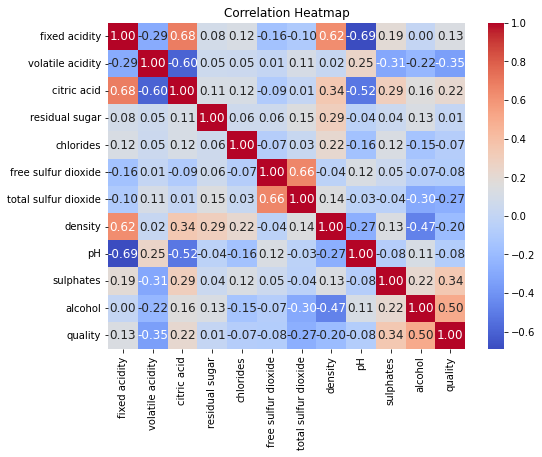

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(data_no_outliers.corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap')
plt.show()

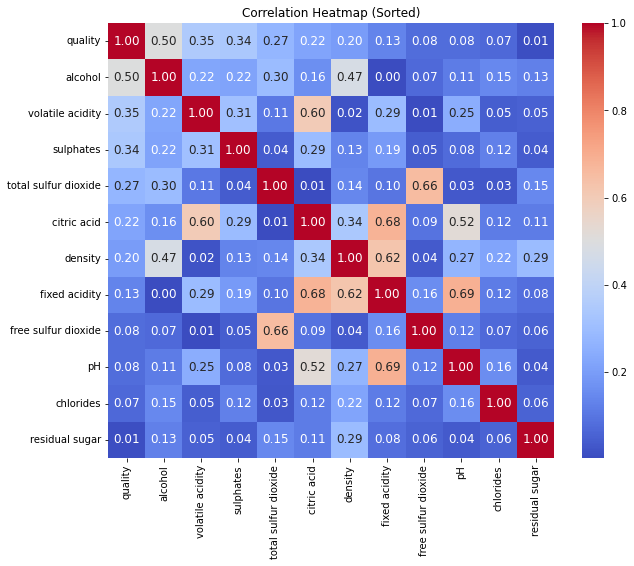

In [27]:
# Calculate correlation matrix
correlation_matrix = data_no_outliers.corr().abs()
plt.figure(figsize=(10, 8))

# Sort the heatmap rows based on correlation with 'Output'
sorted_correlation = correlation_matrix['quality'].sort_values(ascending=False)
sns.heatmap(correlation_matrix.loc[sorted_correlation.index, sorted_correlation.index], annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size': 12})
plt.title('Correlation Heatmap (Sorted)')
plt.show()

### Inference of our Study : 


1. Alcohol , Volatile acidity , sulphates  in this same order shows the most effect on output.

2. Positive relation with - Alcohol,sulphates, citric acid, fixed acidity 

3. Negative realtion with - volatile scidity, density, total sulphur dioxde, pH, free sulphur dioxide.

4. Residual Sugar, chlorides - shows the LEAST effect on output.

5. We can see a co-relation between Alcohol and density and Total sulphur dioxde. 

6. Also, there is a positive relation of Alcohol and citic acid , sulphates. 

4. Volatile acidity with sulphates


## To understand this better lets plot a graph between alcohol, volatile acidity , sulphates and output. 
 

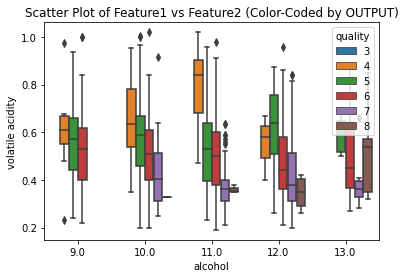

In [28]:

sns.boxplot(x=data_no_outliers['alcohol'].round(decimals=0), y=data_no_outliers['volatile acidity'], hue=data['quality'])

plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.title('Scatter Plot of Feature1 vs Feature2 (Color-Coded by OUTPUT)')

plt.show()

# We can infer that : Quality level Increases as the Alcohol level increase , 
# Quality level increases as the Volatile Acidity decreases. 

In [29]:
## Plot Alcohol and Sulphates against quality

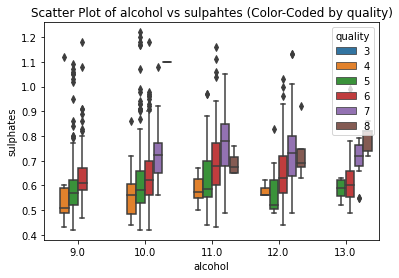

In [30]:
sns.boxplot(x=data_no_outliers['alcohol'].round(decimals=0), y=data_no_outliers['sulphates'], hue=data['quality'])

plt.xlabel('alcohol')
plt.ylabel('sulphates')
plt.title('Scatter Plot of alcohol vs sulpahtes (Color-Coded by quality)')

plt.show()

In [31]:
## Alcohol and Citric acid. 

In [32]:
sns.boxplot(x=data_no_outliers['alcohol'].round(decimals=0), y=data_no_outliers['citric acid'], hue=data['quality'])

plt.xlabel('alcohol')
plt.ylabel('citric acid')
plt.title('Scatter Plot of alcohol vs citric acid (Color-Coded by quality)')

plt.show()

## With the increase in citric acid for alcohol 9 to 12 % , the quality increases. 

## Before concluding anything , lets check what is the impact of residual sugar and alcohol.  
and Volatile acidity + Residual Sugar. 

In [33]:
sns.boxplot(x=data_no_outliers['alcohol'].round(decimals=0), y=data_no_outliers['residual sugar'], hue=data['quality'])

plt.xlabel('alcohol')
plt.ylabel('residual sugar')
plt.title('Scatter Plot of alcohol vs residual sugar (Color-Coded by quality)')

plt.show()

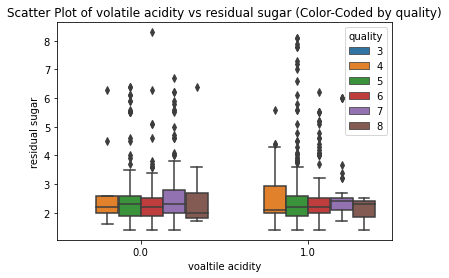

In [34]:
sns.boxplot(x=data_no_outliers['volatile acidity'].round(), y=data_no_outliers['residual sugar'], hue=data['quality'])

plt.xlabel('voaltile acidity')
plt.ylabel('residual sugar')
plt.title('Scatter Plot of volatile acidity vs residual sugar (Color-Coded by quality)')

plt.show()

## As we can see , residual sugar is generalised  , with not so much impact. 
# So, we may even drop this feature. 

## Based on given requiremnets I want to create another categorical column with Bianry Values 0 AND 1 which represents , Quality >= 7 = GOOD/1 and Quality < 7 = NOT GOOD /0 , for simplicity.

In [35]:
# Define a function to apply the condition

def set_value(row):
    if row['quality'] >= 7:
        return 1
    else:
        return 0
    
# Create the new column based on the condition

data_no_outliers['Quality(GOOD)'] = data_no_outliers.apply(lambda row: set_value(row), axis=1)

/var/folders/57/gh5p27812y92gkl08kl8whj40000gn/T/ipykernel_13559/3643020640.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Quality(GOOD)'] = data_no_outliers.apply(lambda row: set_value(row), axis=1)


In [36]:
data_no_outliers

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  Quality(GOOD)  
0         9.4        5              0  
1         9.8        5              0  
2         9.8        5              0  
3         9.8        6              0  
4         9.4        5              0  
...       ...      ...            ...  
1594     10.5        5              0  
1595     11.2        6              0  
1596     11.0        6              0  
1597     10.2        5              0  
1598     11.0        6              0  

[1383 rows x 13 columns]

## 4 Data Standardising

In [38]:

# Separate features and target variable
X = data_no_outliers.drop(columns=['quality','Quality(GOOD)'],axis=1)
y = data_no_outliers['Quality(GOOD)']

from sklearn.preprocessing import StandardScaler

scale= StandardScaler()

X_data = scale.fit_transform(X)
X_data = pd.DataFrame(data=X_data,columns=X.columns)
X_data


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.557366          1.067938    -1.411696       -0.560193  -0.278700   
1         -0.301040          2.177159    -1.411696        0.194186   0.524990   
2         -0.301040          1.437678    -1.194814       -0.129119   0.305801   
3          1.877733         -1.520244     1.624658       -0.560193  -0.315231   
4         -0.557366          1.067938    -1.411696       -0.560193  -0.278700   
...             ...               ...          ...             ...        ...   
1378      -1.326344          0.451704    -0.977931       -0.452425   0.232739   
1379      -1.518589          0.143587    -0.869490       -0.236888  -0.790139   
1380      -1.262263         -0.102906    -0.706828       -0.129119  -0.278700   
1381      -1.518589          0.729010    -0.761049       -0.452425  -0.315231   
1382      -1.454508         -1.335374     1.136673        1.271869  -0.607482   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.474814             -0.363063  0.647274  1.427445   
1                1.013866              0.737411  0.025038 -0.848028   
2               -0.049477              0.303891  0.149485 -0.407614   
3                0.163192              0.503977  0.771721 -1.141638   
4               -0.474814             -0.363063  0.647274  1.427445   
...                   ...                   ...       ...       ...   
1378             1.758206             -0.029586 -1.157210  0.987031   
1379             2.502546              0.203848 -1.020318  1.500848   
1380             1.439203             -0.162977 -0.634532  0.766824   
1381             1.758206             -0.029586 -0.802536  1.867860   
1382             0.269526             -0.096282 -0.790091  0.546617   

      sulphates   alcohol  
0     -0.634979 -0.991772  
1      0.263257 -0.579203  
2      0.038698 -0.579203  
3     -0.485273 -0.579203  
4     -0.634979 -0.991772  
...         ...       ...  
1378  -0.485273  0.142793  
1379   0.862081  0.864790  
1380   0.787228  0.658505  
1381   0.487816 -0.166634  
1382   0.113551  0.658505  

[1383 rows x 11 columns]

## 5. Feature Importance

In [39]:

from sklearn.ensemble import RandomForestClassifier



# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importance = rf.feature_importances_

# Display feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importances:
fixed acidity: 0.06552193169243709
volatile acidity: 0.11404127310445139
citric acid: 0.09434053926476162
residual sugar: 0.06638331863088479
chlorides: 0.07508115219437181
free sulfur dioxide: 0.058594560221036644
total sulfur dioxide: 0.081343084917978
density: 0.09931825954342813
pH: 0.0600037936363185
sulphates: 0.12256939300911811
alcohol: 0.162802693785214


## From above it is clear Alcohol , Sulphates, Citic acid, volatile Acidity plays an important role in output

## 6. Splitting the data

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X_data, y, test_size=0.2, random_state =1000)

print(X.shape, X_train.shape, X_test.shape)

(1383, 11) (1106, 11) (277, 11)


## 7. Data Modeling 

Create a machine learning model pipeline which contains a list of model from which. we want to compare and find the most appropiate algorithm

In [41]:
### Import the model:

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

#from sklearn.svm import SVC 

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import GaussianNB

#import xgboost as xgb




model_pipeline = []    ### create a pipeline model_pipeline

### Append the models and make some necessary updates to their parameters for better model performance.

model_pipeline.append(LogisticRegression())

model_pipeline.append(KNeighborsClassifier(n_neighbors=3))

model_pipeline.append(DecisionTreeClassifier(criterion='entropy',random_state=7))

model_pipeline.append(RandomForestClassifier(random_state=1))

model_pipeline.append(GaussianNB())

#model_pipeline.append(SVC())

#model_pipeline.append(xgb.XGBClassifier(random_state=1))

## 8. Fit model for train dataset  

In [42]:
for model in model_pipeline:
    model.fit(X_train,Y_train)    

## 9. Model Evaluation 

## 9.1 Fetch Classification_Report for predictied data by each model. 

In [43]:
from sklearn.metrics import classification_report
from sklearn import metrics
for model in model_pipeline:
    print("MODEL NAME : ",model,"\n\n",classification_report(y,model.predict(X_data)),"\n\n\n")

MODEL NAME :  LogisticRegression() 

               precision    recall  f1-score   support

           0       0.92      0.97      0.94      1211
           1       0.65      0.37      0.47       172

    accuracy                           0.90      1383
   macro avg       0.78      0.67      0.71      1383
weighted avg       0.88      0.90      0.88      1383
 



MODEL NAME :  KNeighborsClassifier(n_neighbors=3) 

               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1211
           1       0.69      0.63      0.66       172

    accuracy                           0.92      1383
   macro avg       0.82      0.79      0.81      1383
weighted avg       0.92      0.92      0.92      1383
 



MODEL NAME :  DecisionTreeClassifier(criterion='entropy', random_state=7) 

               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1211
           1       0.88      0.92      0.90       172

    ac

## 9.2 Fetch model_score ; accuracy score of original and predicted data .
#### Accuracy score is the indicator of model performance.

In [44]:
#importing

model_score = []
acc_list = []

for model in model_pipeline:
    
    y_pred = model.predict(X_test)
    
    model_score.append(model.score(X_train,Y_train))
    
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))

model_list=['Logistic_Regression','KNN Classifier','Decision Tree Classifier','Random Forest Classifier','GaussianNB']

score_list = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list})
score_list

Model  Model_score  Accuracy
0       Logistic_Regression     0.889693  0.927798
1            KNN Classifier     0.932188  0.866426
2  Decision Tree Classifier     1.000000  0.873646
3  Random Forest Classifier     1.000000  0.931408
4                GaussianNB     0.853526  0.870036

#### Accuracy Score of Random Forest Classifier is the highest.
#### Model with Least accuracy score is KNN classifier. 

## 9.3  Plot ROC Curve for each model : 
#### ROC is the plot of true positive rate against false positive rate at various classification threshold. 
#### AUC is the area under the ROC curve, and higher AUC indicates better model performance.

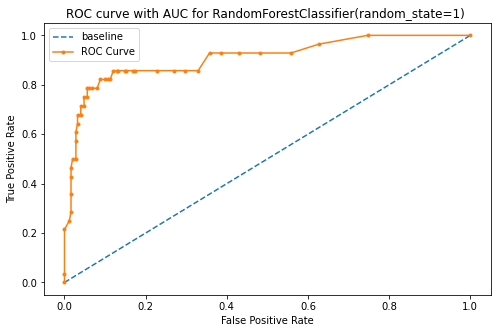

In [45]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc_roc=[] # list to store model roc_auc_score 
b_auc=[]
for model in model_pipeline:
    # generate a baseline prediction (majority class)
    baseline_probs = [0 for _ in range(len(Y_test))]
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:, 1]
    # calculate scores
    auc_roc.append(roc_auc_score(Y_test, probs))
    b_auc.append(roc_auc_score(Y_test,baseline_probs))
    # calculate roc curves
    fpr, tpr, thresholds = roc_curve(Y_test, probs)
    bl_fpr, bl_tpr, thresholds = roc_curve(Y_test, baseline_probs) 
    # plot the roc curve for the model
    fig = plt.figure(figsize=(8,5))
    plt.plot(bl_fpr,bl_tpr, linestyle='--',label='baseline')
    plt.plot(fpr, tpr, marker='.',label='ROC Curve')
    # plot title
    plt.title("ROC curve with AUC for {} ".format(model))
    # axis labels
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    # show the legend
    plt.legend()

In [46]:
AUC_score = pd.DataFrame({'Model':model_list, 'roc_auc_score': auc_roc ,'baseline_auc' :b_auc})
AUC_score

Model  roc_auc_score  baseline_auc
0       Logistic_Regression       0.895152           0.5
1            KNN Classifier       0.830321           0.5
2  Decision Tree Classifier       0.707831           0.5
3  Random Forest Classifier       0.907989           0.5
4                GaussianNB       0.842943           0.5

#### Since , higher AUC indicates better model performance : Random Forest Classifier has Highest auc score
#### While, Decision Tree Classifier has least AUC score

## 9.4  Plot Precision Recall curve for each model :
#### The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

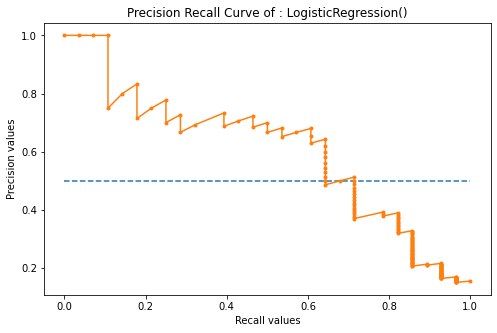

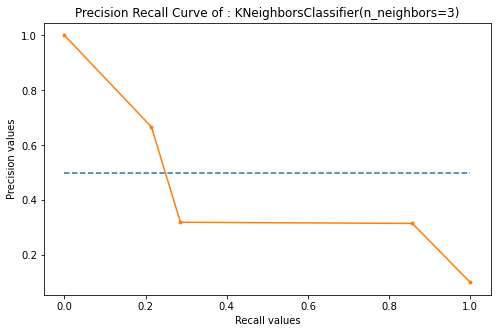

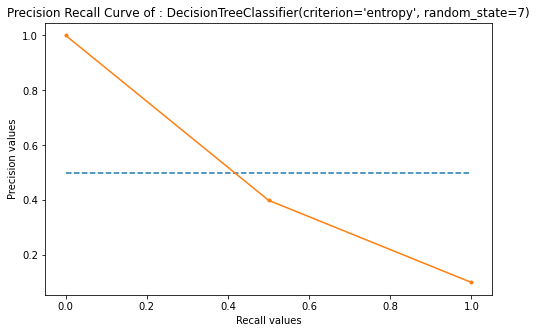

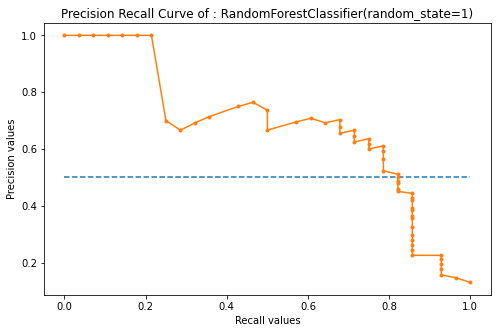

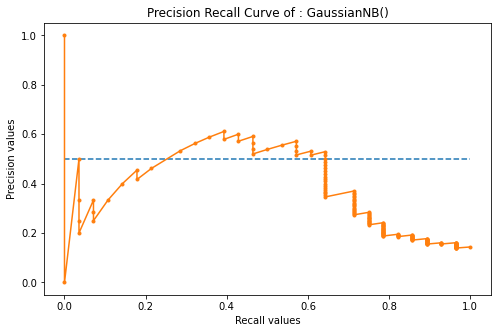

In [47]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score


auc_pc=[]
ap=[]
f1=[]
for model in model_pipeline:
    # predict probabilities
    probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    probs = probs[:,1]
    # predict class values
    prediction = model.predict(X_test)
    precision, recall,thresholds = precision_recall_curve(Y_test, probs)
    auc_pc.append(metrics.auc(recall, precision))
    f1.append(f1_score(Y_test, prediction))
    ap.append(average_precision_score(Y_test, probs))
    
    # plot the precision-recall curves
    fig = plt.figure(figsize=(8,5))
    
    plt.ylabel("Precision values")
    plt.xlabel("Recall values")
    
    plt.title("Precision Recall Curve of : %s"%model)
    
    plt.plot([0, 1], [0.5, 0.5], linestyle='--',label = "baseline")
    plt.plot(recall, precision, marker='.',label="PR curve")


#### Random Forest Classifier covers the larger area under its curve, its AUC score is highest.
#### While, KNN classifier covers the least area under its curve.

### 9.5 Summarize the Model Evaluation : 

In [48]:
result = pd.DataFrame({'Model':model_list, 'Model_score':model_score, 'Accuracy': acc_list, 
                       'roc_auc_score': auc_roc, 'f1-score': f1,'precision-recall AUC': auc_pc, 
                       'average precision score': ap })
result

Model  Model_score  Accuracy  roc_auc_score  f1-score  \
0       Logistic_Regression     0.889693  0.927798       0.895152  0.583333   
1            KNN Classifier     0.932188  0.866426       0.830321  0.301887   
2  Decision Tree Classifier     1.000000  0.873646       0.707831  0.444444   
3  Random Forest Classifier     1.000000  0.931408       0.907989  0.595745   
4                GaussianNB     0.853526  0.870036       0.842943  0.500000   

   precision-recall AUC  average precision score  
0              0.602434                 0.611416  
1              0.425240                 0.360606  
2              0.475271                 0.250542  
3              0.677062                 0.673954  
4              0.387877                 0.411556

## After looking at the values My top 2 models are : Logistic and random Forest classifier

## 10. Comapre the models with KNN algorithm. 

LogisticRegression():
 Mean: 0.894427
 Std: (0.055249) 
 Max:(0.992754)


KNeighborsClassifier(n_neighbors=3):
 Mean: 0.859681
 Std: (0.064391) 
 Max:(0.963768)


DecisionTreeClassifier(criterion='entropy', random_state=7):
 Mean: 0.842269
 Std: (0.062727) 
 Max:(0.956835)


RandomForestClassifier(random_state=1):
 Mean: 0.884272
 Std: (0.066206) 
 Max:(0.992754)


GaussianNB():
 Mean: 0.857549
 Std: (0.080585) 
 Max:(0.971014)




Text(0.5, 1.0, 'Model Comparision')

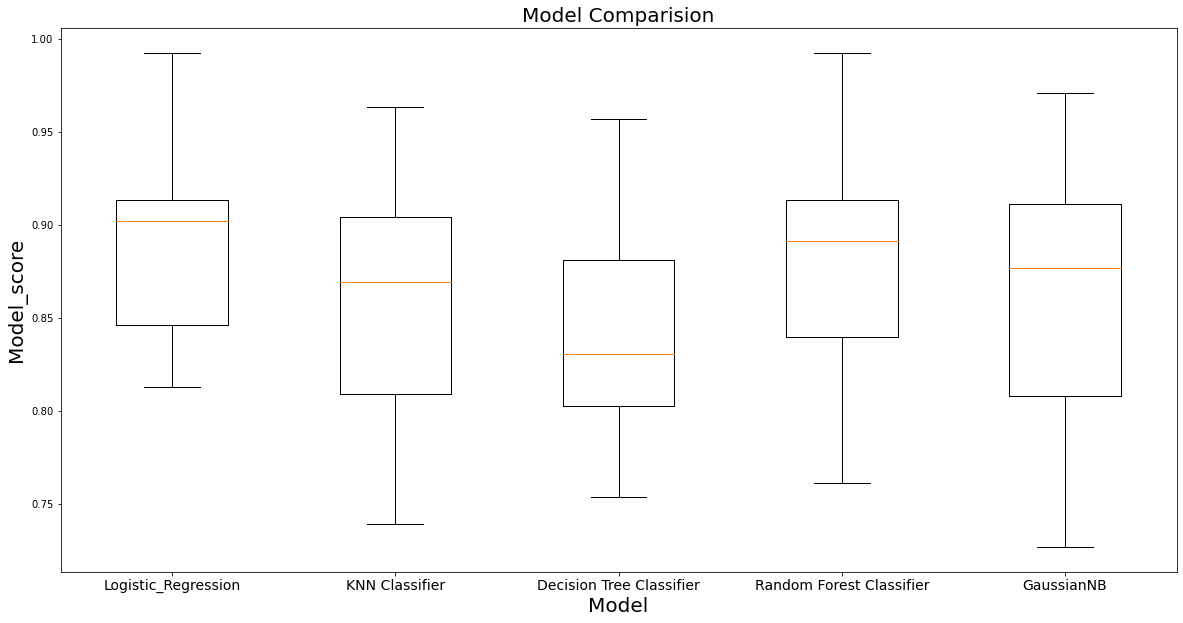

In [49]:
from sklearn import model_selection
seed = 7
results = []
names = [model_list]
scoring = 'accuracy'
for model in model_pipeline:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_data, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    msg = "%s:\n Mean: %f\n Std: (%f) \n Max:(%f)\n\n" % (model, cv_results.mean(), cv_results.std(), cv_results.max())
    print(msg)  
fig = plt.figure(figsize=(20,10))
plt.boxplot(results)
plt.ylabel("Model_score",fontsize =20)
plt.xlabel("Model",fontsize=20)
plt.xticks(range(1,len(model_list)+1), model_list,fontsize =14)
plt.title("Model Comparision",fontsize =20)

### Judging from KNN algorithm model comparison , Clearly Random Forest Classifier shows better performance 